In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
cd /content/drive/MyDrive/colab/Deep_Learning_Computer_Vision

/content/drive/MyDrive/colab/Deep_Learning_Computer_Vision


In [23]:
!ls

efficientdet  faster_rcnn  kaggle.zip  mask_rcnn  preliminary  ssd  yolo


##  selective search를 이용하여 영역 추정

#### selectivesearch 패키지를 설치 ([selectivesearch github](https://github.com/AlpacaDB/selectivesearch))

In [2]:
!pip install selectivesearch

  Created wheel for selectivesearch: filename=selectivesearch-0.4-py3-none-any.whl size=4349 sha256=bed21eebd4c788d5143ecc32ba8c501a3d5f6117a264f2cb1577e291a4d9de18
  Stored in directory: /root/.cache/pip/wheels/83/0e/c9/4713ec9c1692e688f84fd3e80201018a02992949ca63697ba8
Successfully built selectivesearch


#### 실습에 사용할 이미지 불러오기

In [3]:
# content 디렉터리 아래 data 폴더 생성
!mkdir /content/data
# data 디렉터리 아래 audrey01.jpg라는 이름으로 오드리햅번 이미지 다운로드받기
!wget -O /content/data/audrey01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/audrey01.jpg

--2022-01-19 14:04:06--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/audrey01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30102 (29K) [image/jpeg]
Saving to: ‘/content/data/audrey01.jpg’

/content/data/audre 100%[===================>]  29.40K  --.-KB/s    in 0.002s  

2022-01-19 14:04:07 (12.8 MB/s) - ‘/content/data/audrey01.jpg’ saved [30102/30102]



#### 불러온 이미지 출력

이미지 크기: (450, 375, 3)


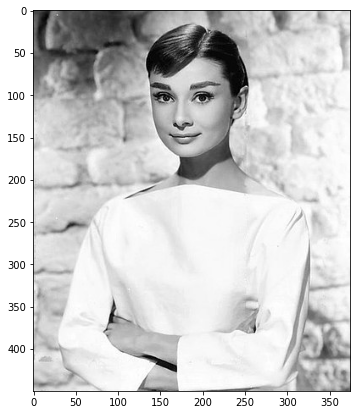

In [4]:
import selectivesearch
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

# 오드리헵번 이미지를 cv2로 로드하고 matplotlib으로 시각화 
img = cv2.imread('./data/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR을 RGB 색상으로 변경 ---①
print('이미지 크기:', img.shape)

plt.figure(figsize=(7, 7))
plt.imshow(img_rgb);

In [5]:
import selectivesearch 

# selectivesearch.selective_search()는 이미지의 영역 추정 정보를 반환 
_, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=2000)

print(type(regions), len(regions))

<class 'list'> 41


scale이나 min_szie 매개변수 크기가 커지면 추정한 후보 영역 개수가 줄어듬

In [6]:
_, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=2500)

print(type(regions), len(regions))

<class 'list'> 33


In [7]:
_, regions = selectivesearch.selective_search(img_rgb, scale=150, min_size=2000)

print(type(regions), len(regions))

<class 'list'> 39


#### 반환된 영역 추정에 대한 정보 보기
반환된 영역 변수는 리스트 타입으로 세부 원소로 딕셔너리를 가지고 있음. 
개별 딕셔너리내 KEY값별 의미
* rect 키값은 x,y 시작 좌표와 너비, 높이 값을 가지며 이 값이 Detected Object 후보를 나타내는 Bounding box임. 
* size는 segment로 select된 Object의 크기
* labels는 해당 rect로 지정된 Bounding Box내에 있는 오브젝트들의 고유 ID
* 아래로 내려갈 수록 너비와 높이 값이 큰 Bounding box이며 하나의 Bounding box에 여러개의 오브젝트가 있을 확률이 커짐. 

In [8]:
regions

[{'labels': [0.0], 'rect': (0, 0, 172, 214), 'size': 18455},
 {'labels': [1.0], 'rect': (16, 0, 117, 51), 'size': 4483},
 {'labels': [2.0], 'rect': (118, 0, 91, 79), 'size': 5074},
 {'labels': [3.0], 'rect': (201, 0, 173, 226), 'size': 23173},
 {'labels': [4.0], 'rect': (78, 11, 60, 98), 'size': 3624},
 {'labels': [5.0], 'rect': (191, 23, 62, 106), 'size': 2460},
 {'labels': [6.0], 'rect': (138, 53, 106, 118), 'size': 8936},
 {'labels': [7.0], 'rect': (305, 105, 69, 215), 'size': 8129},
 {'labels': [8.0], 'rect': (74, 142, 252, 307), 'size': 51916},
 {'labels': [9.0], 'rect': (0, 145, 77, 66), 'size': 3106},
 {'labels': [10.0], 'rect': (0, 181, 119, 85), 'size': 5050},
 {'labels': [11.0], 'rect': (309, 235, 65, 89), 'size': 2549},
 {'labels': [12.0], 'rect': (0, 250, 89, 123), 'size': 4466},
 {'labels': [13.0], 'rect': (0, 251, 66, 60), 'size': 2453},
 {'labels': [14.0], 'rect': (248, 280, 126, 164), 'size': 6034},
 {'labels': [15.0], 'rect': (0, 313, 46, 90), 'size': 2779},
 {'labels'

In [9]:
# rect 정보만 출력해서 보기
rects = [region['rect'] for region in regions]
print(rects)

[(0, 0, 172, 214), (16, 0, 117, 51), (118, 0, 91, 79), (201, 0, 173, 226), (78, 11, 60, 98), (191, 23, 62, 106), (138, 53, 106, 118), (305, 105, 69, 215), (74, 142, 252, 307), (0, 145, 77, 66), (0, 181, 119, 85), (309, 235, 65, 89), (0, 250, 89, 123), (0, 251, 66, 60), (248, 280, 126, 164), (0, 313, 46, 90), (0, 344, 168, 105), (83, 356, 89, 71), (0, 361, 55, 84), (252, 365, 122, 84), (118, 0, 126, 171), (0, 181, 119, 130), (78, 0, 166, 171), (248, 280, 126, 169), (0, 0, 244, 214), (0, 142, 326, 307), (305, 105, 69, 219), (0, 142, 326, 307), (0, 0, 244, 214), (0, 105, 374, 344), (0, 0, 244, 311), (0, 0, 374, 311), (0, 105, 374, 344), (0, 0, 374, 311), (0, 105, 374, 344), (0, 105, 374, 344), (0, 0, 374, 311), (0, 0, 374, 449), (0, 0, 374, 449)]


#### 경계 상자 시각화
- opencv의 rectangle()을 이용하여 시각화
- rectangle()은 이미지와 좌상단 좌표, 우하단 좌표, box컬러색, 두께등을 인자로 입력하면 원본 이미지에 box를 그려줌. 


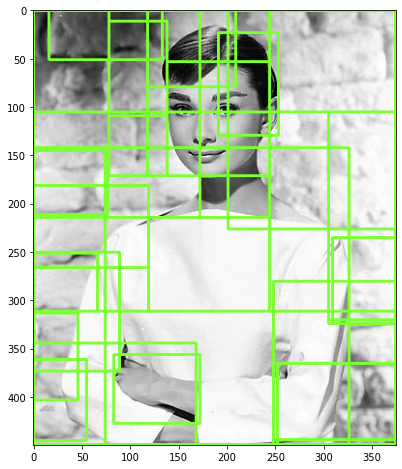

In [10]:
green_rgb = (125, 255, 51) # 경계 상자 색상
img_rgb_copy = img_rgb.copy() # 복사

for rect in rects:
    left = rect[0] # 좌상단 x 좌표
    top = rect[1] # 좌상단 y 좌표
    width, height = rect[2], rect[3] # 너비 및 높이
    right = left + width # 우하단 x 좌표  ---①
    bottom = top + height # 우하단 y 좌표 ---②
    
    # 경계 상자 시각화를 위한 네모 박스 ---③
    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=green_rgb, thickness=2)
    
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb_copy);

#### 경계 상자 크기가 큰 후보만 추출

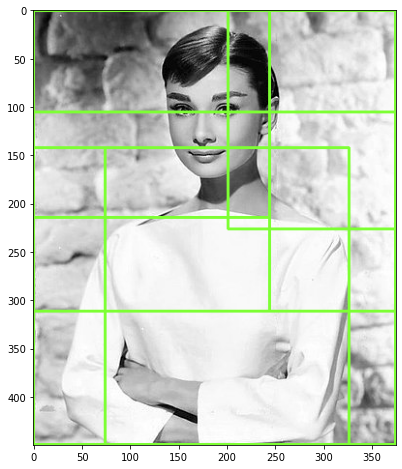

In [11]:
rects = [regions['rect'] for regions in regions if regions['size'] > 20000]

green_rgb = (125, 255, 51) # 경계 상자 색상
img_rgb_copy = img_rgb.copy() # 복사

for rect in rects:
    left = rect[0] # 좌상단 x 좌표
    top = rect[1] # 좌상단 y 좌표
    width, height = rect[2], rect[3] # 너비 및 높이
    right = left + width # 우하단 x 좌표
    bottom = top + height # 우하단 y 좌표 
    
    # 경계 상자 시각화를 위한 네모 박스
    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=green_rgb, thickness=2)
    
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb_copy);

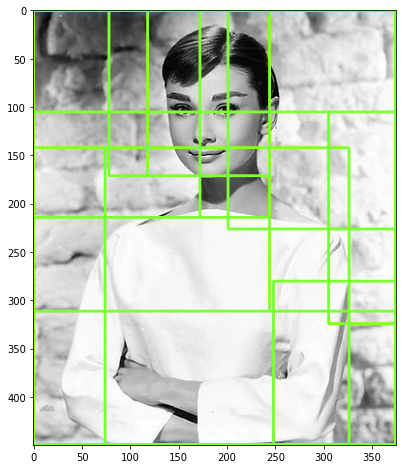

In [12]:
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 10000]

green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy()
for rect in cand_rects:
    
    left = rect[0]
    top = rect[1]
    # rect[2], rect[3]은 너비와 높이이므로 우하단 좌표를 구하기 위해 좌상단 좌표에 각각을 더함. 
    right = left + rect[2]
    bottom = top + rect[3]
    
    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=green_rgb, thickness=2)
    
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb_copy)
plt.show()